       Project_Name  Environmental_Score  Social_Score  Governance_Score  \
0      Solar Farm A             0.833333      0.666667               0.4   
1     Water Plant B             0.333333      0.333333               0.2   
2    Wind Turbine C             1.000000      1.000000               1.0   
3  Green Building D             0.000000      0.000000               0.8   
4    Electric Car E             0.500000      0.533333               0.0   

     Cost  ROI  ESG_Score  
0  500000   12   0.633333  
1  300000    8   0.288889  
2  700000   15   1.000000  
3  450000   10   0.266667  
4  400000   11   0.344444  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Project_Name         5 non-null      object 
 1   Environmental_Score  5 non-null      float64
 2   Social_Score         5 non-null      float64
 3   Governance_Score    

<ipython-input-4-b8f2967a6b27>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_projects, x='Project_Name', y='Predicted_ROI', palette='viridis')


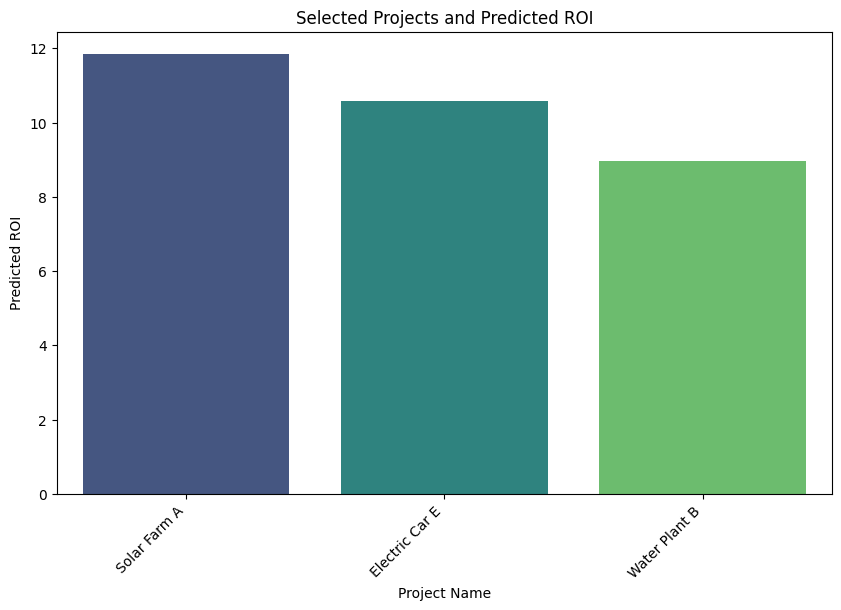

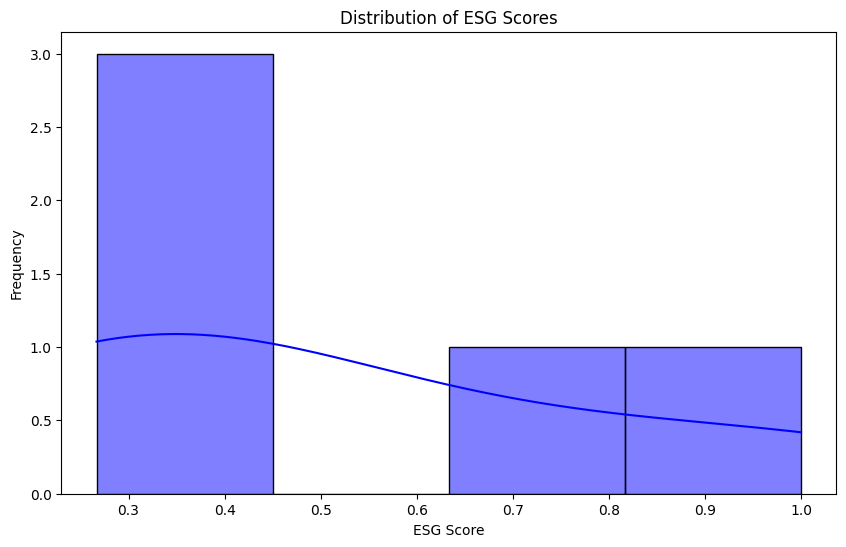

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
# Load the Kaggle ESG dataset (replace 'your_dataset.csv' with the actual file)
df = pd.read_csv("/content/esg_project_data.csv")

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Step 2: Data Preprocessing
# Drop irrelevant columns or handle missing values
df = df.dropna()  # Drop rows with missing values
selected_columns = ['Project_Name', 'Environmental_Score', 'Social_Score', 'Governance_Score', 'Cost', 'ROI']
df = df[selected_columns]

# Normalize ESG scores for uniformity
scaler = MinMaxScaler()
df[['Environmental_Score', 'Social_Score', 'Governance_Score']] = scaler.fit_transform(
    df[['Environmental_Score', 'Social_Score', 'Governance_Score']]
)

# Calculate an overall ESG score
df['ESG_Score'] = (df['Environmental_Score'] + df['Social_Score'] + df['Governance_Score']) / 3

# Step 3: Project Scoring Using AI Model
# Simulate predictive model (Random Forest for ROI prediction based on ESG Scores)
X = df[['Environmental_Score', 'Social_Score', 'Governance_Score']]
y = df['ROI']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Predict ROI for projects
df['Predicted_ROI'] = model.predict(X)

# Rank projects by ESG score and predicted ROI
df['Priority_Score'] = df['ESG_Score'] * df['Predicted_ROI']
df = df.sort_values(by='Priority_Score', ascending=False)

print(df.head())

# Step 4: Optimization Engine
# Define constraints and objective function
budget = 1000000  # Example total budget
project_costs = df['Cost'].values
roi = df['Predicted_ROI'].values

# Linear programming to maximize ROI within the budget
c = -roi  # Objective function (negative for maximization)
A = [project_costs]
b = [budget]

# Binary constraints (select project or not)
x_bounds = [(0, 1) for _ in range(len(project_costs))]

# Solve the optimization problem
res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Select projects to fund
df['Selected'] = res.x.round()

print("Selected Projects:")
print(df[df['Selected'] == 1])

# Step 5: Visualization Dashboard
# Plot selected projects and their ROI
selected_projects = df[df['Selected'] == 1]

plt.figure(figsize=(10, 6))
sns.barplot(data=selected_projects, x='Project_Name', y='Predicted_ROI', palette='viridis')
plt.title("Selected Projects and Predicted ROI")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Predicted ROI")
plt.xlabel("Project Name")
plt.show()

# ESG Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ESG_Score'], kde=True, color='blue')
plt.title("Distribution of ESG Scores")
plt.xlabel("ESG Score")
plt.ylabel("Frequency")
plt.show()

       Project_Name  Environmental_Score  Social_Score  Governance_Score  \
0      Solar Farm A             0.833333      0.666667               0.4   
1     Water Plant B             0.333333      0.333333               0.2   
2    Wind Turbine C             1.000000      1.000000               1.0   
3  Green Building D             0.000000      0.000000               0.8   
4    Electric Car E             0.500000      0.533333               0.0   

     Cost  ROI  ESG_Score  
0  500000   12   0.633333  
1  300000    8   0.288889  
2  700000   15   1.000000  
3  450000   10   0.266667  
4  400000   11   0.344444  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Project_Name         5 non-null      object 
 1   Environmental_Score  5 non-null      float64
 2   Social_Score         5 non-null      float64
 3   Governance_Score    

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


       Project_Name  Environmental_Score  Social_Score  Governance_Score  \
2    Wind Turbine C             1.000000      1.000000               1.0   
0      Solar Farm A             0.833333      0.666667               0.4   
4    Electric Car E             0.500000      0.533333               0.0   
1     Water Plant B             0.333333      0.333333               0.2   
3  Green Building D             0.000000      0.000000               0.8   

     Cost  ROI  ESG_Score                                Project_Description  \
2  700000   15   1.000000  Wind turbine generation system for green energ...   
0  500000   12   0.633333  A sustainable solar farm providing clean energ...   
4  400000   11   0.344444  Electric vehicle production plant to reduce ca...   
1  300000    8   0.288889  A community-based water treatment project for ...   
3  450000   10   0.266667  Green building designed with energy-efficient ...   

   Sentiment_Score  Adjusted_ESG_Score  Predicted_ROI  Priorit

<ipython-input-6-347b3400c2b0>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_projects, x='Project_Name', y='Predicted_ROI', palette='viridis')


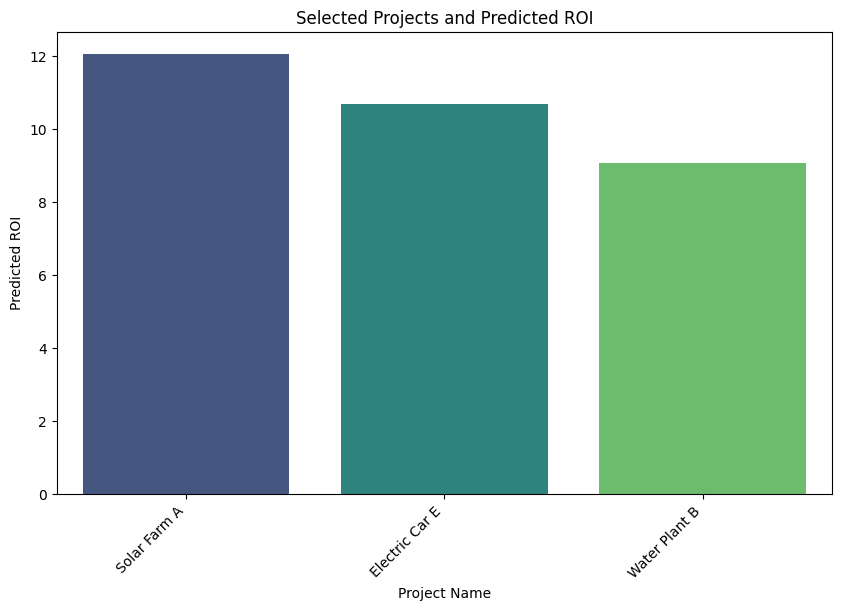

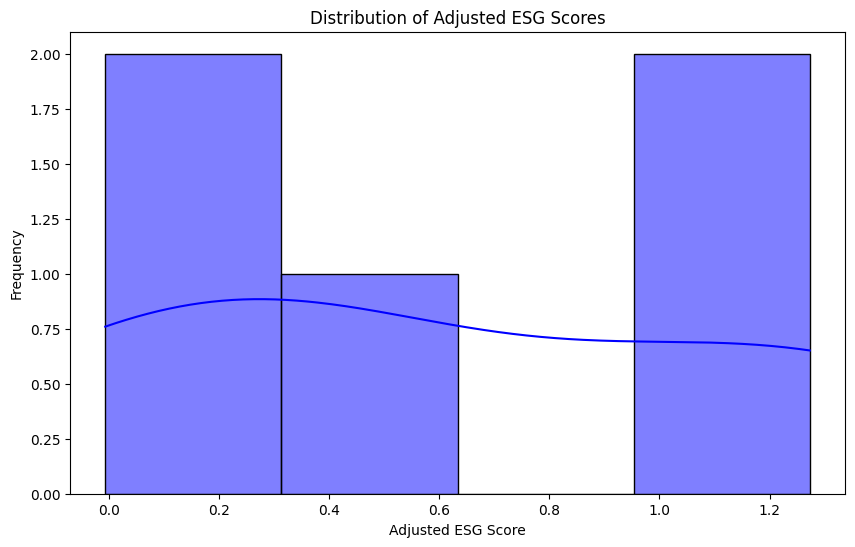

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Step 1: Load the Dataset
# Sample ESG dataset (You can replace it with actual data as required)
file_path = '/content/esg_project_data.csv'
df = pd.read_csv(file_path)

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Step 2: Data Preprocessing
# Drop irrelevant columns or handle missing values
df = df.dropna()  # Drop rows with missing values

# Select relevant columns
selected_columns = ['Project_Name', 'Environmental_Score', 'Social_Score', 'Governance_Score', 'Cost', 'ROI']
df = df[selected_columns]

# Normalize ESG scores for uniformity
scaler = MinMaxScaler()
df[['Environmental_Score', 'Social_Score', 'Governance_Score']] = scaler.fit_transform(
    df[['Environmental_Score', 'Social_Score', 'Governance_Score']]
)

# Calculate overall ESG score
df['ESG_Score'] = (df['Environmental_Score'] + df['Social_Score'] + df['Governance_Score']) / 3

# Step 3: NLP for Extracting Insights from Project Descriptions (Simulated)
# Example: Sentiment analysis of project descriptions (if available) to enhance scoring
# Simulating project descriptions (replace with real unstructured text data)
df['Project_Description'] = [
    "A sustainable solar farm providing clean energy to rural areas.",
    "A community-based water treatment project for drinking water access.",
    "Wind turbine generation system for green energy production.",
    "Green building designed with energy-efficient technology and low environmental impact.",
    "Electric vehicle production plant to reduce carbon emissions."
]

# Use SentimentIntensityAnalyzer from NLTK for sentiment analysis (as an example)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Simulate NLP to evaluate project descriptions (positive sentiment indicates higher impact)
df['Sentiment_Score'] = df['Project_Description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Integrate sentiment score into the overall ESG score (higher sentiment = higher impact)
df['Adjusted_ESG_Score'] = df['ESG_Score'] + df['Sentiment_Score']

# Step 4: Project Scoring Using AI Model (Random Forest)
# Simulate predictive model for ROI prediction based on ESG Scores and Sentiment Analysis
X = df[['Environmental_Score', 'Social_Score', 'Governance_Score', 'Sentiment_Score']]
y = df['ROI']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Predict ROI for projects
df['Predicted_ROI'] = model.predict(X)

# Rank projects by adjusted ESG score and predicted ROI
df['Priority_Score'] = df['Adjusted_ESG_Score'] * df['Predicted_ROI']
df = df.sort_values(by='Priority_Score', ascending=False)

print(df.head())

# Step 5: Optimization Engine (Maximizing ROI within the Budget)
budget = 1000000  # Example total budget
project_costs = df['Cost'].values
roi = df['Predicted_ROI'].values

# Linear programming to maximize ROI within the budget
c = -roi  # Objective function (negative for maximization)
A = [project_costs]
b = [budget]

# Binary constraints (select project or not)
x_bounds = [(0, 1) for _ in range(len(project_costs))]

# Solve the optimization problem
res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Select projects to fund
df['Selected'] = res.x.round()

print("Selected Projects:")
print(df[df['Selected'] == 1])

# Step 6: Visualization Dashboard

# Plot selected projects and their ROI
selected_projects = df[df['Selected'] == 1]

plt.figure(figsize=(10, 6))
sns.barplot(data=selected_projects, x='Project_Name', y='Predicted_ROI', palette='viridis')
plt.title("Selected Projects and Predicted ROI")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Predicted ROI")
plt.xlabel("Project Name")
plt.show()

# ESG Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Adjusted_ESG_Score'], kde=True, color='blue')
plt.title("Distribution of Adjusted ESG Scores")
plt.xlabel("Adjusted ESG Score")
plt.ylabel("Frequency")
plt.show()

